# <center> Predicting Star Size | Linear Regression
---

<center> <img src = 'https://drive.google.com/uc?id=1Wr3rLlNCBU5qjr1s7o1l-O3DjgLDZIJi' width = 100%>

---

## <center> Linear Regression from Scratch

---
    


**Recall the following topics before we start today's session:-**        
**1)** Supervised Learning - When we train the ML algorithms with labeled data.       
**2)** Forward Propagation - Consists of two steps which are computing the predicted output and the cost function.         
**3)** Backpropagation - Consists of optimization algorithm which will be used to update the model parameters.         
**4)** Training - For each epoch we calculate the loss and then update the model parameters.            
**5)** Testing - Using new inputs whose respective outputs if we know, we can check how our model is performing.         

    
**Python Libraires that we need today:-**           
**1)** NumPy       
**2)** Matplotlib        
**3)** Pandas
    
                                

## Generating the Data for Linear Regression


In [1]:
# Importing Libraries (numpy and pyplot)
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

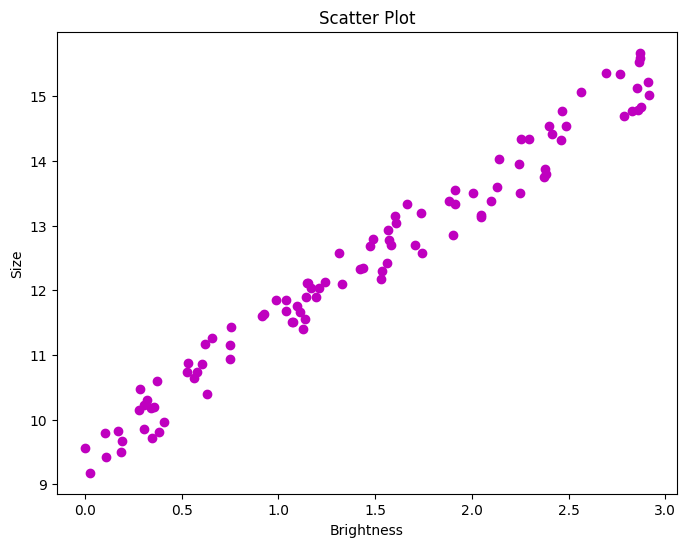

In [3]:
# Use seed value of 100 so that everyone gets the same output!


# Generating Randomized dataset --> X_train and y_train
'''
X_train = 3*random numbers between 0 and 1 of shape (100, 1)
y_train = 9 + 2*X_train + noise, where noise is a random number between 0 and 1 and its shape is (100, 1)
The noise will allow to have some randomness in output instead of it simply being in a straight line

Our goal of this session is to train ML model --> Linear Regression to predict the values of 9 and 2 in y_train
In reality, we don't have y_train formula. Hence, we make ML model to predict what should be the formula!
'''
x_train = np.random.random((100,1))*3
noise = np.random.random((100,1))
y_train = 9 + 2*x_train + noise

# Scatter plot --> Figsize is (8,6), Xlabel is brightness, ylabel is Size, add title

plt.figure(figsize=(8,6))
plt.scatter(x_train,y_train,color='m')
plt.title('Scatter Plot')
plt.xlabel('Brightness')
plt.ylabel('Size')
plt.show()



In [ ]:
# Print first 5 values in X_train and y_train
print(x_train[:5])
print()
print(y_train[:5])



[[1.08651304]
 [1.31425559]
 [1.35741069]
 [0.13324548]
 [0.79053963]]

[[12.02617059]
 [11.74641373]
 [12.44816943]
 [ 9.70917928]
 [11.40538321]]


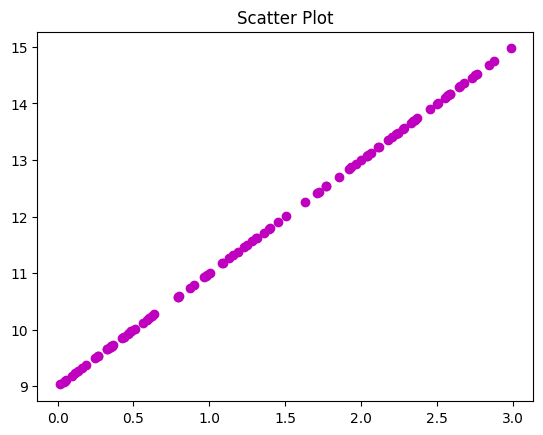

In [ ]:
# Check what happens if you remove the noise! --> Remove noise from the y_train and plot again
noiseless_y_train = 9 + 2*x_train

plt.scatter(x_train,noiseless_y_train,color='m')
plt.title('Scatter Plot')
plt.show()

## Model Parameters and Hyperparameters

Remember that instead of using gradient and y-intercept, we will be using the actual model parameters for ML algorithms - Weight and Bias!

In [11]:
# Initialise the weight (W) and bias (b) to 0
W =0
b =0

# Hyperparameters --> Choose approproate learning_rate (0.01)
learning_rate = 0.01


<img src = "https://drive.google.com/uc?id=1mFaXv4XF-_b-jyP_MK2vfgYfB2dVd4RZ">

## Computing equations for the forward propagation

In [7]:
# Create a function for Predicted Output
def predict(X, W, b):
    '''
    ------Parameters------

    X - Inputs
    W - Weight
    b - Bias

    Returns - Predicted output
    '''
    y_pred = W*X + b

    return y_pred

# MSE cost function
def cost_function(X, y, W, b):
    '''
    y - target values / true values
    Returns - MSE
    '''
    error = y - predict(X, W, b)
    error_squared = y - (predict(X, W, b))**2
    cost = np.mean(error_squared)

    return cost

In [8]:
# Testing functions
cost_function(x_train, y_train, W, b)

12.39952999360468

<img src = 'https://drive.google.com/uc?id=1ZlXFrHr4ix4w2ND9e1QMZqaMuplh-PTh'>

## Computing equations for the backpropagation


In [14]:
def update_params(X, y, W, b, learning_rate):
    '''
    This function computes all the equations needed for the backpropagation in Linear Regression

    ---------
    learning_rate: alpha value for gradient descent

    ---------

    W - Updated Weight
    b - Updated Bias

    '''

    # Prediction and Error term
    y_pred = predict(X, W, b)
    error = y - y_pred

    # Compute Partial Derivatives
    dLdW = np.mean(-2 * X * error)
    dLdb = np.mean(-2 * error)

    # Apply Gradient Descent
    W = W - learning_rate * dLdW
    b = b - learning_rate * dLdb

    return W,b

In [15]:
update_params(x_train, y_train, W, b, learning_rate)

(0.38721238742891956, 0.24799059987209363)

In [ ]:
# Epoch by epoch train the linear regression to get the best value for W and b
def train(X, y, W, b, learning_rate, tol=1e-13, verbose=False):
    '''
    This function trains the linear regression epoch by epoch
    tol - Threshold for when the training should stop based on convergence
    verbose - Display the training if it is set to True
    '''
    pass

In [ ]:
# Train the linear regression model
weights, biases, costs, iteration_count = train(X_train, y_train, W, b, learning_rate, verbose=True)

In [ ]:
# Comparing initial and final values
initial = [weights[0], biases[0], costs[0]]
final = [weights[-1], biases[-1], costs[-1]]
df = pd.DataFrame(list(zip(initial,final)),
                  columns = ['Initial', 'Final'],
                  index = ['Weight', 'Bias', 'Cost'])
df

In [ ]:
# Visualising the cost wrt epochs
plt.figure(figsize=(10, 4))
plt.plot(costs, color='m')
plt.xlabel('Epochs', color='blue')
plt.ylabel('Costs', color='blue')
plt.title('Costs vs Epochs', weight='bold', color='maroon')
plt.show()



In [ ]:
# Define a seed value (using different seed value compared to trianing set to avoid data leakage!) --> 5007
np.random.seed(5007)  # This number was choose to get the optimal results with random values

# Test data
X_test = 3*np.random.rand(10,1)
y_test = 9 + 2*X_test + np.random.rand(10,1)

prediction = predict(X_test, weights[-1], biases[-1])

# DataFrame to compare true and predicted outputs on test inputs
df1 = pd.DataFrame(list(zip(X_test.reshape(10,), y_test.reshape(10,), prediction.reshape(10,))),
                  columns = ['Test Input', 'True Output', 'Predicted Output'])
df1

In [ ]:
# Calculate the mean sqaured error to evaluate the performance
mse = np.mean((y_test - prediction)**2)
print(f'The Means Squared Error:- {round(mse, 3)} (3dp).')

In [ ]:
# Visualise the performance of the test data
plt.figure(figsize = (10,4))
plt.plot(X_test, prediction, color="k", linewidth = 0.7)
plt.scatter(X_test, y_test, color="c", marker = '*', s = 20, zorder = 2)
plt.title("Visualisig the performance of the test data", color = 'red', weight = 'bold')
plt.xlabel("Test Inputs", color = 'm', fontsize = 13)
plt.ylabel("Star Property", color = 'm', fontsize = 13)
plt.legend(['Predicted Linear Regression', 'True Values'], loc='lower right')
plt.show()

---

## <center> Linear Regression using Scikit-Learn library

---

- Linear regression is a foundational algorithm in machine learning.
- It is used for predicting a continuous target variable based on one or more input features.
- Scikit-learn's `LinearRegression` module provides a straightforward way to implement this technique.
- However, it uses Ordinary Least Square Regression to get the line of best fit.

Let us compare our Gradient Descent method with sklearn's Ordinary Least Square Regression method...


#### Step 1: Input Data

**Gather your data:-**
- You need a dataset with input features (independent variables) and corresponding target values (dependent variable).
- Both of this data already defined for our usecase.

In [ ]:
# Training data - first 5 sample
print('First 5 Independent Feature:-\n', X_train[:5])
print()
print('Rescpective Dependent Feature:-\n', y_train[:5])

In [ ]:
# Testing data - first 5 sample
print('First 5 Independent Feature:-\n', X_test[:5])
print()
print('Rescpective Dependent Feature:-\n', y_test[:5])

#### Step 2: Import and Initialize

**Import the necessary modules:-**
- Import the `LinearRegression` class from scikit-learn's `linear_model` module.
- [Here](https://github.com/scikit-learn/scikit-learn/blob/main/sklearn/linear_model/_base.py) is the official code from sklearn. Just press `ctrl+f` and search for `LinearRegression`.

**Create a model instance:-**
- Initialize a LinearRegression object.
- This represents the linear relationship between the inputs and the target.


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
sklearn_model = LinearRegression(fit_intercept=True,  # If true include intercept
                                 copy_X=True,         # If true reserve a copy of X so that it remains unchanged
                                 n_jobs=None,         # If none, single CPU core, no parallelization used
                                 positive=False)      # If true, forces the coefficients to be positive

#### Step 3: Training

**Fit the model:-**
- Use the `fit()` method of the model to train it on your data.
- The algorithm learns the coefficients and intercept that define the linear relationship.

**Learning process:-**
- The algorithm internally uses the least squares optimization method.
- It is used to minimize the sum of squared differences between the actual target values and the predicted values.

In [ ]:
sklearn_model.fit(X_train, y_train)

In [ ]:
print('Scikit-Learn model:-')
print('Optimal Weight = {}'.format(sklearn_model.coef_[0][0]))
print('Optimal Bias = {}'.format(sklearn_model.intercept_[0]))

print()

print('Scratch model:-')
print('Optimal Weight = {}'.format(weights[-1]))
print('Optimal Bias = {}'.format(biases[-1]))

#### Step 4: Prediction

**Make predictions:-**
- Once the model is trained, you can use the `predict()` method to make predictions on new data points.
- The model applies the learned linear relationship to these inputs.

In [ ]:
predictions = sklearn_model.predict(X_test)
mse_skl = np.mean((y_test - predictions)**2)
print(f"The MSE value of sklearn model:- {round(mse_skl, 5)} (5dp)")
print(f"The MSE value of scratch model:- {round(mse, 5)} (5dp)")

* Both the Gradient Desecent and Ordinary Least Square Regression methods are performing well!

In [ ]:
# Visualise the performance of the test data
plt.figure(figsize = (10,5))
plt.plot(X_test, prediction, color="k", label="predicted", linewidth = 0.7)
plt.plot(X_test, predictions,  "g--", label="predicted", linewidth = 0.7)
plt.scatter(X_test, y_test, color="c", label="original", marker = 'x', s = 20, zorder = 2)
plt.title(f"Visulaising the performance on the test data", color = 'red')
plt.xlabel("Test Inputs", color = 'm', fontsize = 11)
plt.ylabel("Star Property", color = 'm', fontsize = 11)
plt.legend(['Scratch Model', 'Scikit-Learn Model', 'True Values', ], loc = 'lower right')
plt.show()

* Just look at how similar predictions we are getting!
* Now that you have learnt gradient descent algorithm, it will be very useful in some of the upcoming lectures.

### Ending Notes
- Remember, while Linear Regression is powerful, it's just the beginning.
- Machine learning offers a vast array of algorithms for different tasks, each with its strengths and weaknesses.
- We shall dive deeper into this exciting field to explore more advanced techniques in the upcoming days.

---